# 강화학습 Tutorial & OpenAI Gym 소개 

# Agent

환경(Environment)과 상호작용하며 강화학습 알고리즘을 적용 받아 어떤 액션을 취할 우리의 Player

# Environment 

결국 OpenAI Gym이 제공하는 것은 우리의 Agent가 경험하며 학습해 나갈 'Environment' 이다!

In [1]:
from IPython.display import Image

In [2]:
import gym
env = gym.make('CartPole-v0') # Environment 설정
env.reset() # 이건 초기화인가? (게임 시작 상태?)
for _ in range(10000):
    env.render() # 렌더링, 즉 화면출력
    env.step(env.action_space.sample()) # 랜덤 액션을 가져온다

[2016-11-07 21:20:53,158] Making new env: CartPole-v0
[2016-11-07 21:20:53,912] You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


# Observations 

각 스텝에서 랜덤 액션을 가져오는 것보다, 우리의 액션이 environment에서 무엇을 할지 아는 것이 좋을 것이다.

environment's <strong>step</strong> 함수는 정확히 우리가 원하는 것을 리턴한다. 
실제로 <strong>step</strong>은 4가지 values를 리턴한다.

* <strong>observation</strong>(object) : envirionment-specific하게 관찰되는 객체이다. 예를 들면, 카메라의 픽셀 데이터, 로봇의 관절 각도, 보드 게임의 보드 상태 등이다.(Agent가 관찰하게 되는 environment의 state)

* <strong>reward</strong>(float) : 전 액션으로 성취되는 보상이다. 스케일은 환경에 따라 상이하지만 목적은 항상 너의 전체 보상을 높이는 것이다.

* <strong>done</strong>(boolean) : environment를 reset할지 말지 정한다. 만약 <strong>done</strong>이 <strong>True</strong>이라면 그 에피소드는 끝난 것이다. (pole이 너무 끝으로 가버리거나, 남은 목숨이 없거나)

* <strong>info</strong>(dict) : 디버깅에 유용한 정보. 이는 때때로 학습에 유용할 수도 있다. (예를 들어, environment's의 마지막 상태 변화 후의 raw probabilities를 포함할 수도 있다.) 하지만 공식적인 학습에 사용되진 않는다.

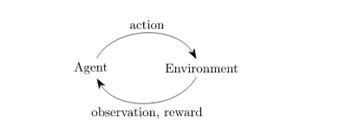

In [3]:
Image('./image/gym_tuto_1.jpg')

하나의 초기 <strong>observation</strong>을 리턴하는 <strong>reset</strong>을 호출하며 프로세스가 시작된다. 

In [7]:
import gym
env = gym.make('CartPole-v0')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

[2016-10-29 01:13:39,118] Making new env: CartPole-v0


[ 0.03716141 -0.02856732  0.03955771  0.02626693]
[ 0.03659007  0.16596568  0.04008305 -0.25367735]
[ 0.03990938  0.36049305  0.0350095  -0.53345278]
[ 0.04711924  0.16489668  0.02434044 -0.22994731]
[ 0.05041717  0.3596625   0.0197415  -0.51485412]
[ 0.05761042  0.55450096  0.00944441 -0.80125123]
[ 0.06870044  0.74949211 -0.00658061 -1.0909483 ]
[ 0.08369029  0.94470017 -0.02839958 -1.38568874]
[ 0.10258429  1.14016447 -0.05611335 -1.68711532]
[ 0.12538758  1.3358887  -0.08985566 -1.99672823]
[ 0.15210535  1.5318279  -0.12979022 -2.31583334]
[ 0.18274191  1.33810674 -0.17610689 -2.06574696]
Episode finished after 12 timesteps
[-0.02297933  0.01716888  0.04572533 -0.00189769]
[-0.02263595  0.21160625  0.04568737 -0.27981034]
[-0.01840383  0.01586335  0.04009117  0.02692504]
[-0.01808656 -0.17980992  0.04062967  0.33198275]
[-0.02168276 -0.37548593  0.04726932  0.63719637]
[-0.02919248 -0.57123409  0.06001325  0.94438264]
[-0.04061716 -0.76711091  0.0789009   1.25530223]
[-0.05595938 -

# Spaces 

위 예제에서, 우리는 environment's action space로부터 random actions을 샘플링했다. 모든 environment는 유효한 actions과 observations을 묘사하는 <strong>Space</strong> 객체가 딸려온다.

In [1]:
import gym
env = gym.make('CartPole-v0')
print(env.action_space)
#> Discrete(2)
print(env.observation_space)
#> Box(4,)

[2016-10-29 01:00:28,540] Making new env: CartPole-v0


Discrete(2)
Box(4,)


### Discrete 

<strong>Discrete</strong> space는 고정된 음이 아닌 수의 범위를 가지고, 이 경우 유효한 액션은 0 혹은 1이 된다?(Discrete(2))

* 취할 수 있는 액션

### Box

<strong>Box</strong> space는 n차원의 box를 나타내는데, 유효한 observations은 4개 숫자로 이루어진 array이다.

In [2]:
print(env.observation_space.high)
#> array([ 2.4       ,         inf,  0.20943951,         inf])
print(env.observation_space.low)
#> array([-2.4       ,        -inf, -0.20943951,        -inf])

[  4.80000000e+00   3.40282347e+38   4.18879020e-01   3.40282347e+38]
[ -4.80000000e+00  -3.40282347e+38  -4.18879020e-01  -3.40282347e+38]


In [3]:
from gym import spaces
space = spaces.Discrete(8) # Set with 8 elements {0, 1, 2, ..., 7}
x = space.sample()
assert space.contains(x)
assert space.n == 8

# Recording and uploading results

<strong>gym</strong>은 environment에 대한 당신의 알고리즘을 간단하게 녹화해주며, 알고리즘 러닝 자체를 비디오로 만든다.
아래와 같이 <strong>monitor</strong>을 사용하면 된다.

In [8]:
import gym
env = gym.make('CartPole-v0')
env.monitor.start('/result/cartpole-experiment-1')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break

env.monitor.close()

[2016-10-29 01:14:00,538] Making new env: CartPole-v0
[2016-10-29 01:14:00,595] Starting new video recorder writing to /result/cartpole-experiment-1/openaigym.video.1.25.video000000.mp4


GLException: invalid enumerant

이는 알고리즘의 성능을 로깅할 수 있을 것이다.
당신은 결과물을 OpenAI Gym에 업로드할 수도 있다.

In [ ]:
import gym
gym.upload('/tmp/cartpole-experiment-1', api_key='YOUR_API_KEY')